## 로지스틱 회귀 분석
>로지스틱 회귀 분석 : 입력에 대한 이진분류 학습 모델

### 목차
* 로지스틱회귀분석
* 생존가능 여부 분류예측 : 타이타닉 데이터셋

In [1]:
from sklearn.linear_model import LogisticRegression

study_hour = [[2],[5],[1],[7],[3],[4],[17],[6],[8],[5]]
class_pass = [0,1,0,1,0,0,1,1,1,0]
lr = LogisticRegression()
train_X = study_hour
train_Y = class_pass
lr.fit(train_X, train_Y)

LogisticRegression()

In [2]:
print("모델 정확도: ", lr.score(train_X, train_Y))
pred_Y = lr.predict(train_X)
print("로지스틱 모델이 예측한 y값: ",list(pred_Y))
print("실제 y값: ", train_Y)

모델 정확도:  0.9
로지스틱 모델이 예측한 y값:  [0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
실제 y값:  [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [3]:
#학습된 모델로 새로운 데이터 입력에 대해 예측 값을 확인
test_X = [[4.5],[5.5]]
pred_Y = lr.predict(test_X)
print(pred_Y)

[0 1]


## 생존 가능 여부 분류 예측 : 타이타닉 데이터셋

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [5]:
#필요한 컬럼만 남기고, 데이터 갯수와 타입 확인
dataset = titanic.copy()
dataset.drop(['class','who','deck','embark_town','alive'], axis=1, inplace=True)
print("==== 데이터 갯수 확인 ====")
print(dataset.count())
print("==== 데이터 타입 확인 ====")
print(dataset.info())

==== 데이터 갯수 확인 ====
survived      891
pclass        891
sex           891
age           714
sibsp         891
parch         891
fare          891
embarked      889
adult_male    891
alone         891
dtype: int64
==== 데이터 타입 확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB
None


* 데이터 변환!!

In [6]:
#선형 상관계수를 계산하거나, 회귀학습을 위해 선택된 데이터를 수치형 데이터로 변환!!
def encoding_sex(x):
    if x == 'male':
        return 0
    else:
        return 1
    
def encoding_embarked(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    else:
        return 2
    
def encoding_adult_male(x):
    if x == True:
        return 1
    else:
        return 0
    
def encoding_alone(x):
    if x == True:
        return 1
    else:
        return 0

In [7]:
dataset['sex'] = dataset['sex'].apply(encoding_sex)
dataset['embarked'] = dataset['embarked'].apply(encoding_embarked)
dataset['alone'] = dataset['alone'].apply(encoding_alone)
dataset['adult_male'] = dataset['adult_male'].apply(encoding_adult_male)

In [8]:
#데이터셋 분리(학습용/평가용)
trainset = dataset.iloc[150: ]
testset = dataset.iloc[ :150]
print("==== trainset의 평균값 ====")
print(trainset.mean())
print("==== testset의 평균값 ====")
print(testset.mean())

==== trainset의 평균값 ====
survived       0.390013
pclass         2.283401
sex            0.349528
age           30.150658
sibsp          0.500675
parch          0.379217
fare          33.035385
embarked       0.360324
adult_male     0.605938
alone          0.614035
dtype: float64
==== testset의 평균값 ====
survived       0.353333
pclass         2.433333
sex            0.366667
age           27.486198
sibsp          0.633333
parch          0.393333
fare          28.098193
embarked       0.393333
adult_male     0.586667
alone          0.546667
dtype: float64


In [9]:
#결측데이터 제거
trainset.dropna(inplace=True)
testset.dropna(inplace=True)
print(trainset.count())
print(testset.count())

survived      593
pclass        593
sex           593
age           593
sibsp         593
parch         593
fare          593
embarked      593
adult_male    593
alone         593
dtype: int64
survived      121
pclass        121
sex           121
age           121
sibsp         121
parch         121
fare          121
embarked      121
adult_male    121
alone         121
dtype: int64


<ipython-input-9-c84345cf04f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset.dropna(inplace=True)
<ipython-input-9-c84345cf04f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset.dropna(inplace=True)


In [10]:
#상관계수 확인
res = trainset.corr()
print(res['survived'])

survived      1.000000
pclass       -0.401617
sex           0.535314
age          -0.081432
sibsp         0.010953
parch         0.099588
fare          0.307583
embarked      0.128869
adult_male   -0.556944
alone        -0.235429
Name: survived, dtype: float64


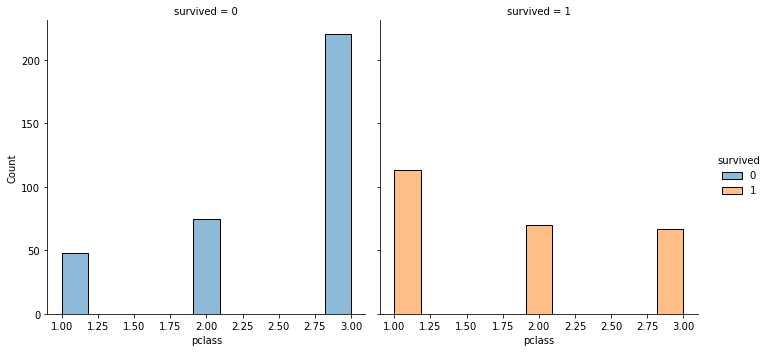

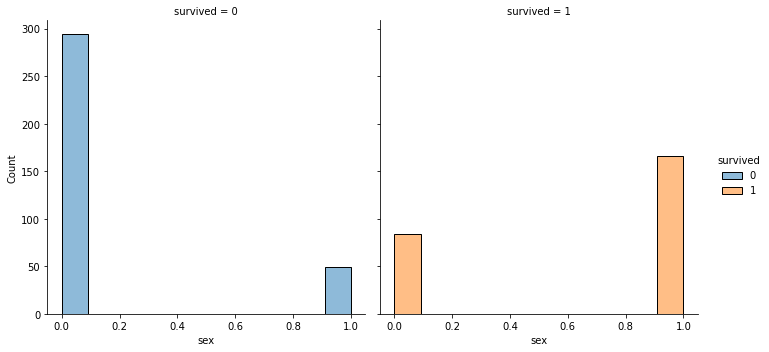

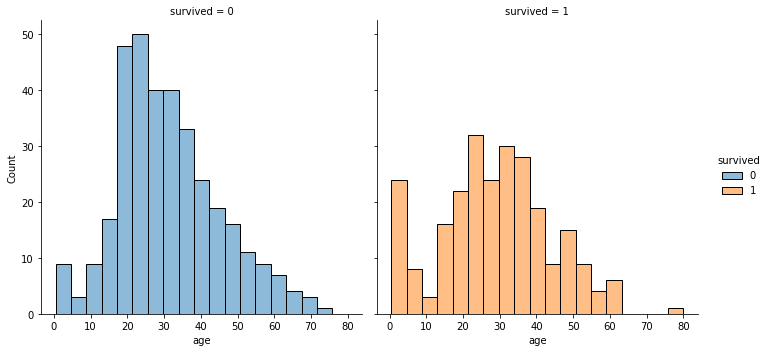

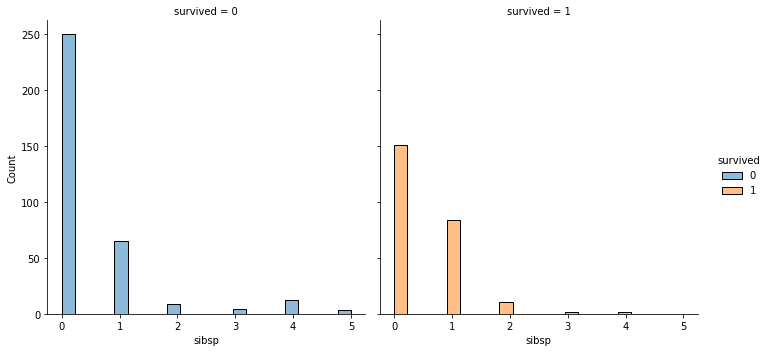

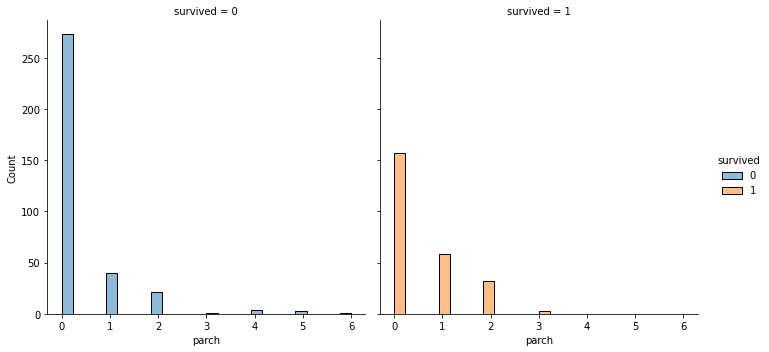

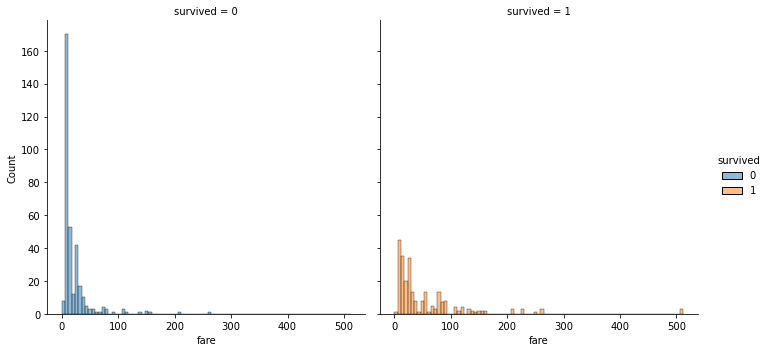

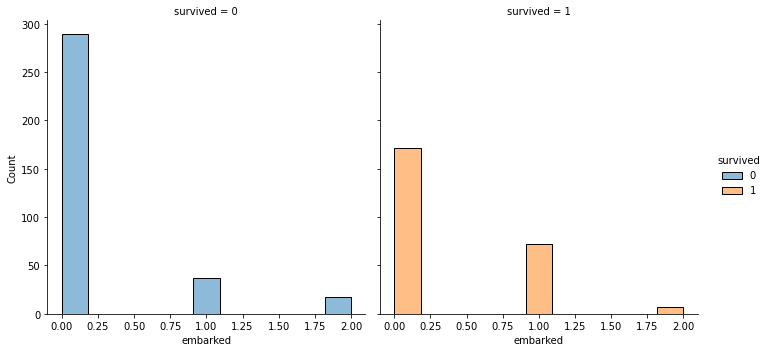

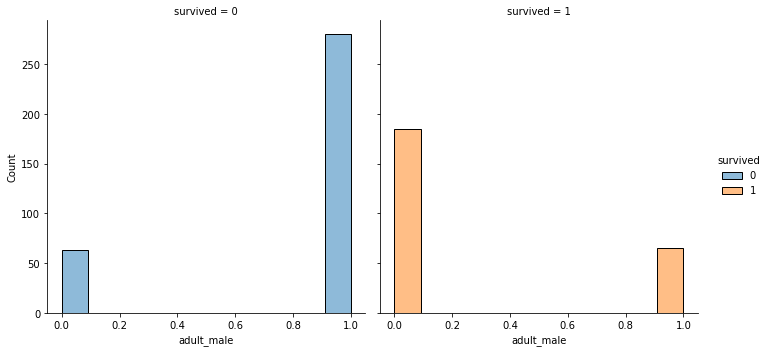

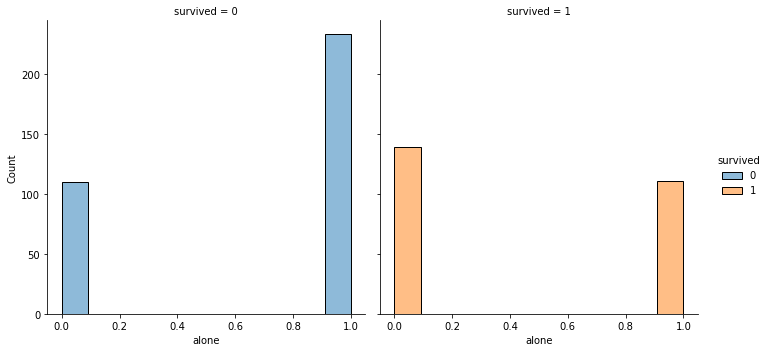

In [11]:
for c in trainset.columns:
    if c != 'survived':
        sns.displot(x = c, col = 'survived', hue = 'survived', data=trainset)
        plt.show

In [12]:
#로지스틱 회귀모델 학습!! 충분한 학습을 위해 max_iter값을 높이자
lr = LogisticRegression(max_iter = 300)
train_X = trainset.drop(['survived'], axis=1)
train_Y = trainset['survived']
test_X = testset.drop(['survived'], axis = 1)
test_Y = testset['survived']
lr.fit(train_X, train_Y)

LogisticRegression(max_iter=300)

### 독립변수 선택에 따른 모델 성능 ?!?

1. 사용할 독립변수를 설정 => 데이터탐색, 시각화 과정을 통해서,,

In [13]:
columns = ['pclass','sex','age','sibsp','fare','adult_male']
train_X = trainset[columns]
train_Y = trainset['survived']
test_X = testset[columns]
test_Y = testset['survived']
lr.fit(train_X, train_Y)
print("학습데이터 정확도: ", lr.score(train_X, train_Y))
print("평가데이터 정확도: ", lr.score(test_X, test_Y))

학습데이터 정확도:  0.8330522765598651
평가데이터 정확도:  0.8099173553719008


2. 학습 데이터셋에서 age 결측된 행 제거 ==> age 값을 평균값으로 대체 해보기!

In [14]:
trainset = dataset.iloc[150:].copy()
trainset.fillna(trainset['age'].mean(), inplace=True)
columns = ['pclass','sex','age','sibsp','fare','adult_male']
train_X = trainset[columns]
train_Y = trainset['survived']
#testset은 결측데이터가 제거된 버전을 계속 사용하기!!!
test_X = testset[columns]
test_Y = testset['survived']
lr.fit(train_X, train_Y)
print("학습데이터 정확도: ", lr.score(train_X, train_Y))
print("평가데이터 정확도: ", lr.score(test_X, test_Y))

학습데이터 정확도:  0.8232118758434548
평가데이터 정확도:  0.8099173553719008
